In [33]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
from sklearn.datasets import load_boston

In [35]:
boston_dataset=load_boston()

<h2>Print the value of the boston_dataset</h2>

In [36]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


<li>data: contains the information for various houses</li>
<li>target: prices of the house</li>
<li>feature_names: names of the features</li>
<li>DESCR: describes the dataset</li>


In [37]:
df=pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<li>CRIM: Per capita crime rate by town</li>
<li>ZN: Proportion of residential land zoned for lots over 25,000 sq. ft</li>
<li>INDUS: Proportion of non-retail business acres per town</li>
<li>CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li>NOX: Nitric oxide concentration (parts per 10 million)</li>
<li>RM: Average number of rooms per dwelling</li>
<li>AGE: Proportion of owner-occupied units built prior to 1940</li>
<li>DIS: Weighted distances to five Boston employment centers</li>
<li>RAD: Index of accessibility to radial highways</li>
<li>TAX: Full-value property tax rate per $10,000 </li>
<li>PTRATIO: Pupil-teacher ratio by town </li>
<li>B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town </li>
<li>LSTAT: Percentage of lower status of the population </li>
<li>MEDV: Median value of owner-occupied homes in $1000s </li>


Creating new target column MEDV MedianValueofOwner

In [38]:
df['MEDV']=boston_dataset.target

## Data Preprocessing

In [39]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [40]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory Data Analysis

In [41]:
#plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


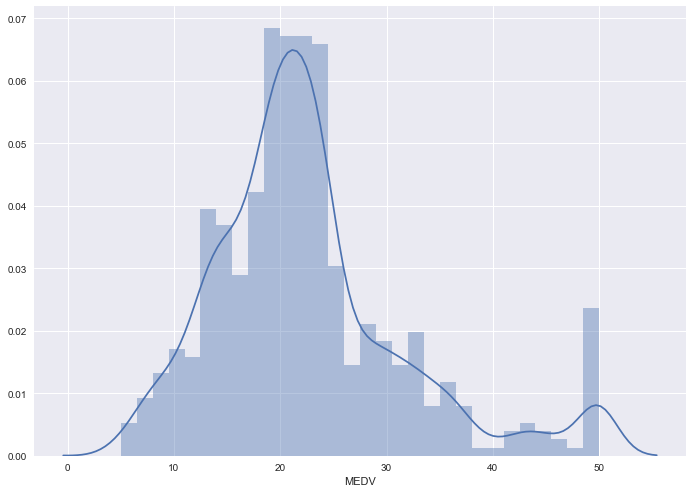

In [42]:
sns.distplot(df.MEDV,bins=30)
plt.show()

We see that the values of MEDV are distributed normally with few outliers.

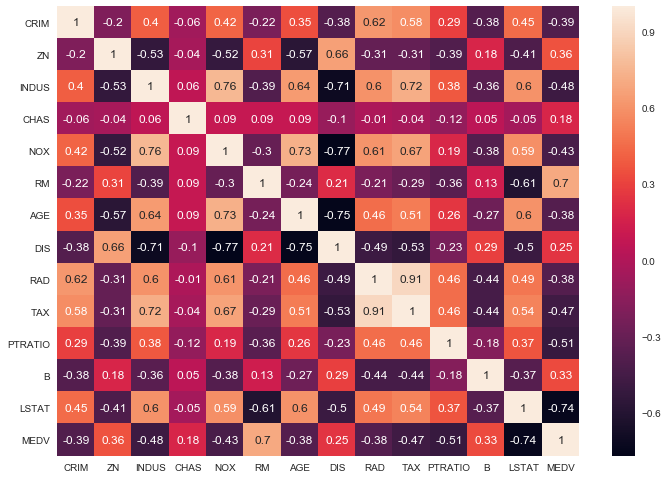

In [43]:
corr_matrix=df.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.
<p>
Observations:
To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).
An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.
</p>
<p>
Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.
</p>

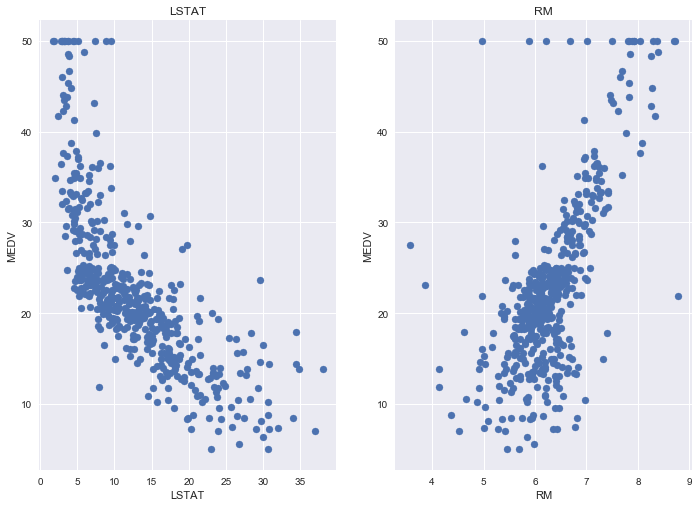

In [44]:
features=['LSTAT','RM']
target=df['MEDV']

for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=df[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [45]:
x=df[['LSTAT','RM']]
Y=df['MEDV']

In [46]:
x.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [47]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
pred=lin_reg.predict(x_test)

In [54]:
MSE_test=mean_squared_error(y_test,pred)
RMSE_test=np.sqrt(MSE_test)
r2 = sklearn.metrics.r2_score(y_test,pred)

In [55]:
print(MSE_test)
print(RMSE_test)
print(r2)

26.392886822666103
5.137400784702913
0.662899697518695


In [57]:
pred_train=lin_reg.predict(x_train)

In [58]:
MSE_train=mean_squared_error(y_train,pred_train)
RMSE_train=np.sqrt(MSE_train)
r2_train = sklearn.metrics.r2_score(y_train,pred_train)

In [59]:
print(MSE_train)
print(RMSE_train)
print(r2_train)

31.777227140320214
5.6371293350711955
0.6300745149331701
